In [12]:
import numpy as np
import matplotlib.pyplot as plt
import src.math_tool as mt
import src.img_tool as it
import src.apertures as apertures
from PIL import Image
%load_ext autoreload
%autoreload 2
%matplotlib ipympl
ideal = np.load('aperture/f32f45_angular8.npy')
# perform conv_lambda to expand block region by circle of diameter 5 pixels
# test = np.array([[1, 1, 1, 1, 1, 1, 1],
#                   [1, 1, 1, 1, 1, 1, 1],
#                   [1, 1, 1, 1, 1, 1, 1],
#                   [1, 1, 1, 0, 1, 1, 1],
#                   [1, 1, 1, 1, 1, 1, 1],
#                   [1, 1, 1, 1, 1, 1, 1],
#                   [1, 1, 1, 1, 1, 1, 1]]).astype(bool)
circle_d5_corner = np.array([[1, 0, 0, 0, 1],
                             [0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0],
                             [1, 0, 0, 0, 1]]).astype(bool)
elliptic_dx7y3_corner = np.array([[1, 0, 0, 0, 0, 0, 1],
                                  [0, 0, 0, 0, 0, 0, 0],
                                  [1, 0, 0, 0, 0, 0, 1]]).astype(bool).T
def corrosive_kernel_func(arr): # return False if any pixel in diameter 5 is False
    tmp = arr + elliptic_dx7y3_corner
    return tmp.min()
def constructive_kernel_func(arr): # return True if any pixel in diameter 5 is True
    tmp = arr * (elliptic_dx7y3_corner==False)
    return tmp.max()
tmp = it.img_pad(ideal, N_pad_xy=(3, 3, 1, 1), pad_val=False)
man_file = it.conv_lambda2D(tmp, kernel_shape=(7, 3), f=corrosive_kernel_func)
tmp = it.img_pad(man_file, N_pad_xy=(3, 3, 1, 1), pad_val=False)
product = it.conv_lambda2D(tmp, kernel_shape=(7, 3), f=constructive_kernel_func)
diff = product*1 - ideal*1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


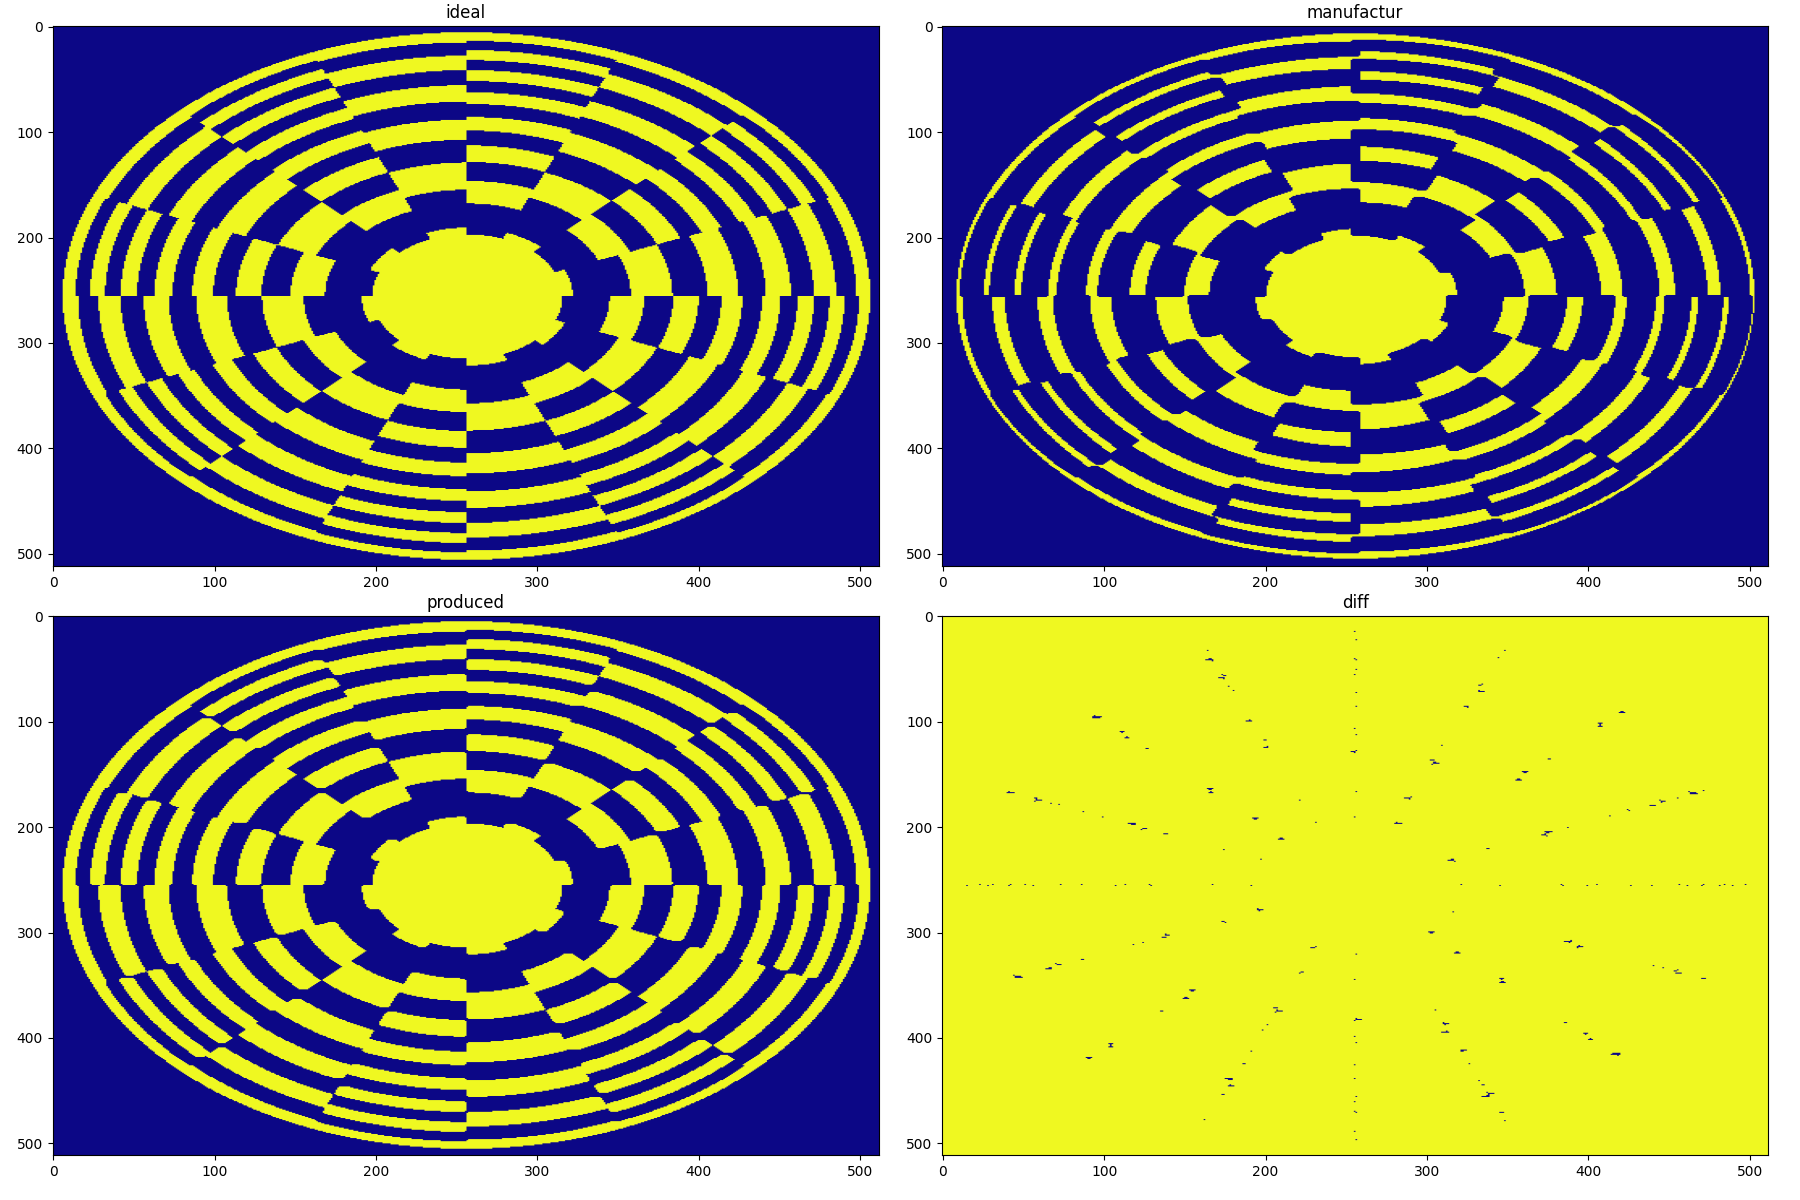

In [22]:
layout = [[0, 1], [2, 3]]
fig, ax = plt.subplot_mosaic(layout, figsize=(18,12))
title = ['ideal', 'manufactur', 'produced', 'diff']
image = [ideal, man_file, product, diff]
fig.tight_layout(pad=1.5)
for i in range(len(title)):
    ax[i].imshow(image[i].T, aspect='auto', cmap='plasma')
    ax[i].set_title(title[i])

In [26]:
print((product!=ideal).mean()*100)
tmp = (man_file[6:-6, 6:-6]==False)

0.1922607421875


In [24]:
it.array_2_img(tmp, './aperture/man_files/f32f45_inverted_edx7y3_d504.bmp')